# Analysis of selected funds

In [96]:
import feather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import sparse

In [97]:
path = '../data/processed/holdings_summary_s.feather'
info_df = feather.read_dataframe(path)

In [98]:
# Convert to date format
begin_date = '2018-01-01' 
end_date   = '2018-01-31'

In [99]:
info_df = info_df[(info_df.report_dt >= begin_date) & (info_df.report_dt <= end_date)]

In [100]:
info_df.shape

(1160, 9)

## Number of unique port_nos and fund_nos

In [101]:
info_df.sample(5)

,port_no,report_dt,fund_name,avrcs,lipper_class,False,cap_class,style_class,fund_no
62376,1024461,2018-01-31,"AB Variable Products Series Fund, Inc: AB VPS ...",97.559535,SCGE,LCVE,S,G,38712
82750,1025376,2018-01-31,EQ Advisors Trust: EQ/UBS Growth and Income Po...,97.420930,MLCE,LCVE,M,C,39143
98747,1026129,2018-01-31,"Thrivent Series Fund, Inc: Thrivent Mid Cap St...",91.817907,MCCE,LCVE,M,C,39609
135107,1028219,2018-01-31,William Blair Funds: Mid Cap Growth Fund; Clas...,96.791837,MCGE,LCVE,M,G,6618
150869,1030218,2018-01-31,Columbia Funds Variable Series Trust II: CTIVP...,95.489167,LCGE,LCVE,L,G,49596


In [102]:
info_df[['lipper_class','cap_class','style_class']] = info_df[['lipper_class','cap_class','style_class']].astype('category')

In [103]:
info_df.dtypes

port_no                  int64
report_dt       datetime64[ns]
fund_name               object
avrcs                  float64
lipper_class          category
False                   object
cap_class             category
style_class           category
fund_no                  int64
dtype: object

In [104]:
info_df['report_dt'].describe()

count                    1160
unique                      1
top       2018-01-31 00:00:00
freq                     1160
first     2018-01-31 00:00:00
last      2018-01-31 00:00:00
Name: report_dt, dtype: object

In [105]:
print(info_df['port_no'].nunique())
print(info_df['fund_no'].nunique())

1160
1160


## Number of unique funds per year

#### Something seems odd
Break in 2009 not clear

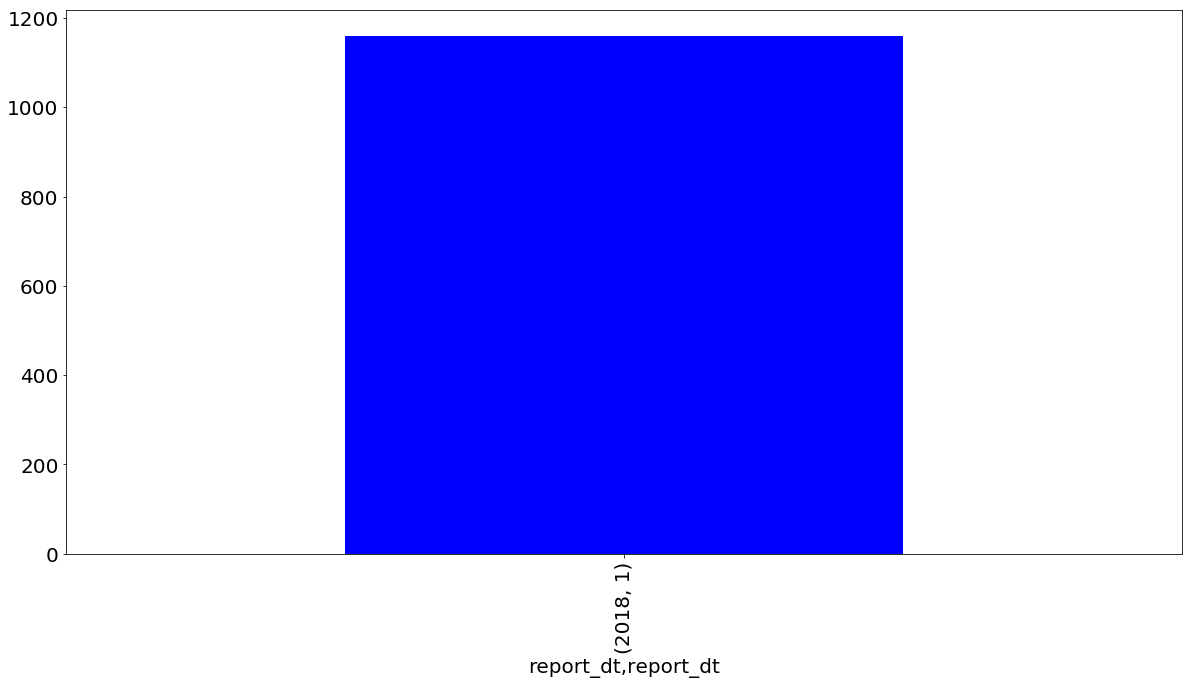

In [106]:
# Analysis of selected funds

## Distribution by date(info_df["report_dt"]
(info_df["port_no"]
    .groupby([
         info_df["report_dt"].dt.year,
         info_df["report_dt"].dt.month
     ])
     .nunique()
     .plot(kind="bar",
           color = 'b',
           figsize=(20,10)))

## Distribution by number of observations per fund 

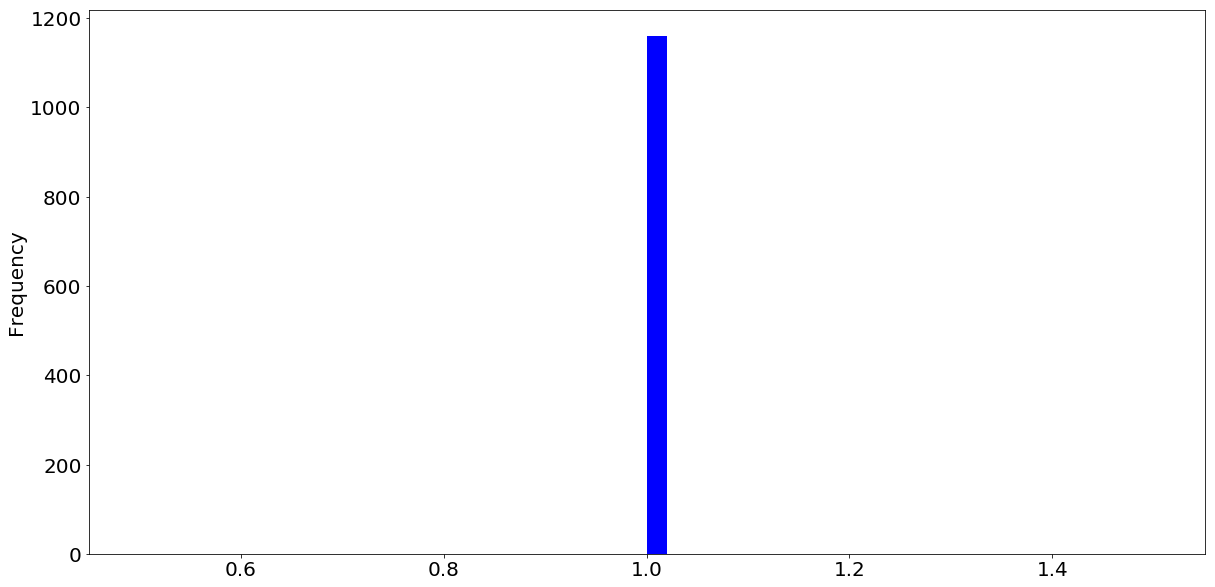

In [107]:
(info_df["port_no"]
     .groupby([
         info_df["port_no"],
     ])
     .count()
     .plot(kind="hist",
           bins = 50,
           color = 'b',
           figsize=(20,10)))

## Distribution by lipper_class

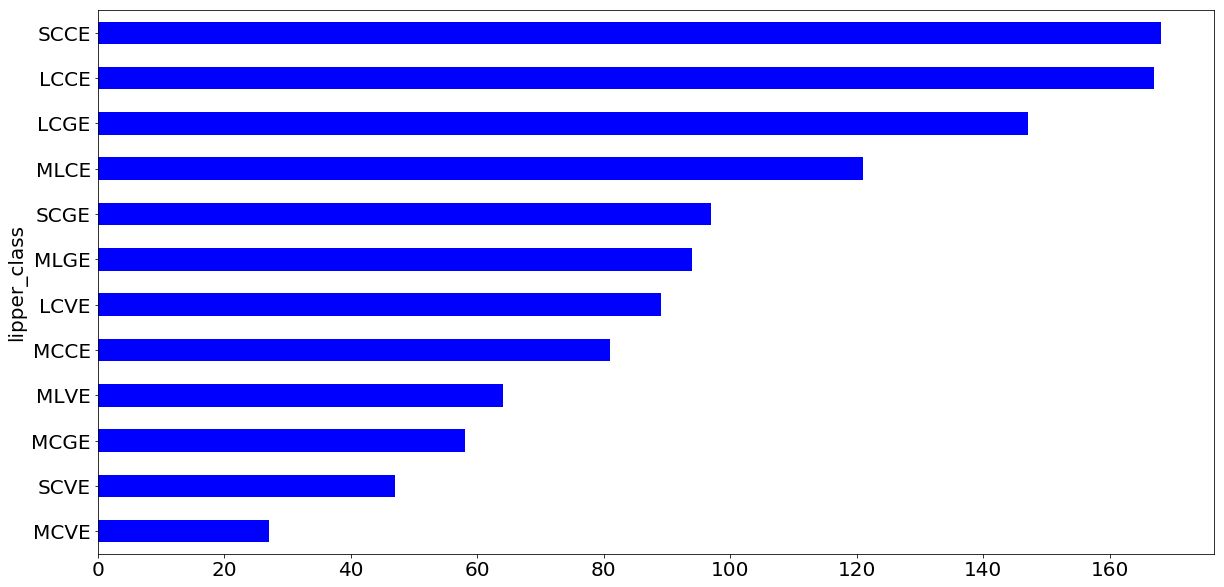

In [108]:
(info_df["port_no"]
     .groupby([
         info_df["lipper_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

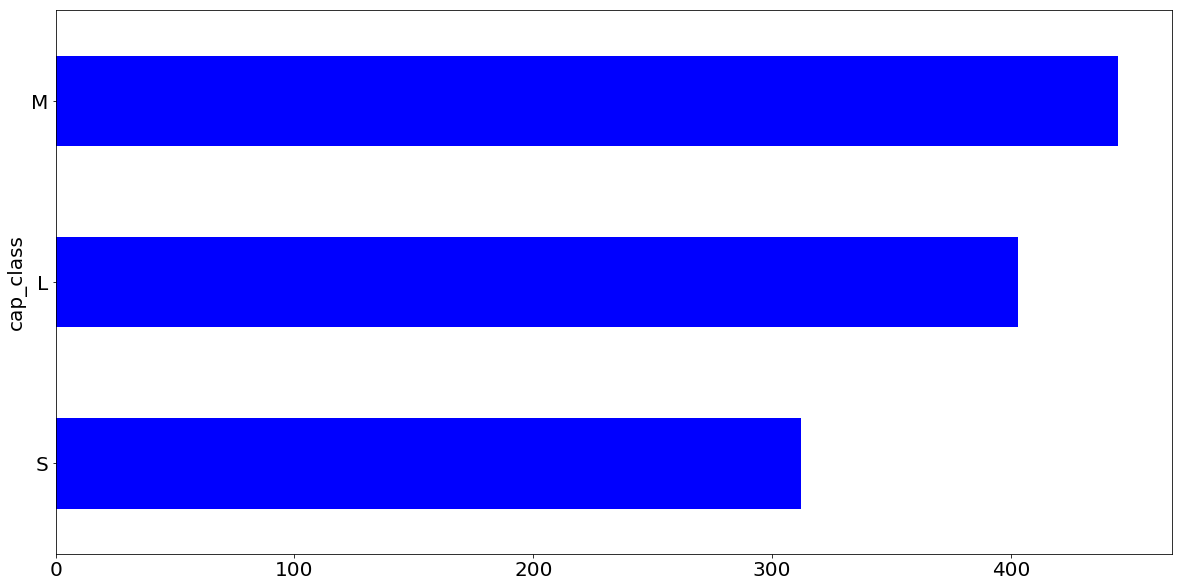

In [109]:
(info_df["port_no"]
     .groupby([
         info_df["cap_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

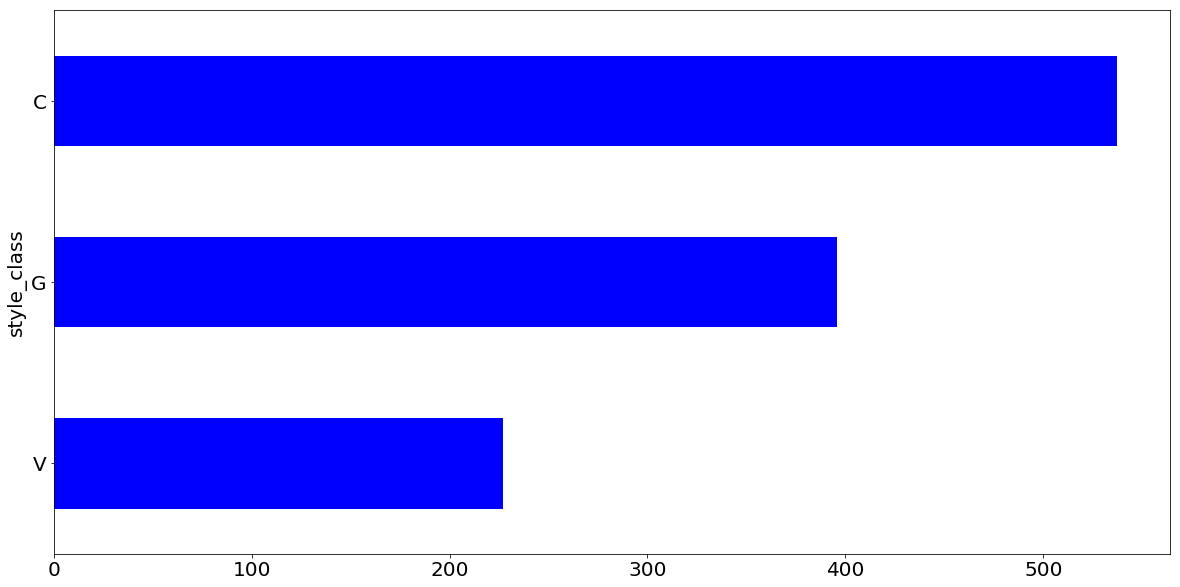

In [110]:
(info_df["port_no"]
     .groupby([
         info_df["style_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

### Histogram of average percentage of common stock (over complete period)
Maybe low and high values should be filtered out

(array([  1.,   0.,   5.,   2.,   9.,   8.,  14.,  58., 513., 550.]),
 array([ 13.49632653,  22.50108518,  31.50584383,  40.51060248,
         49.51536114,  58.52011979,  67.52487844,  76.52963709,
         85.53439574,  94.53915439, 103.54391304]),
 <a list of 10 Patch objects>)

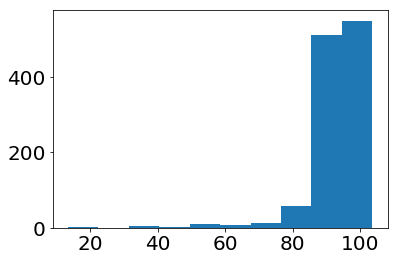

In [111]:
plt.hist(
    info_df['avrcs']
)

In [112]:
info_df.avrcs.describe()

count    1160.000000
mean       92.648863
std         7.805164
min        13.496327
25%        91.958787
50%        94.400371
75%        96.380957
max       103.543913
Name: avrcs, dtype: float64

## How often do lipper_classes change?


In [113]:
plt.rc('font', size=20)          # controls default text sizes

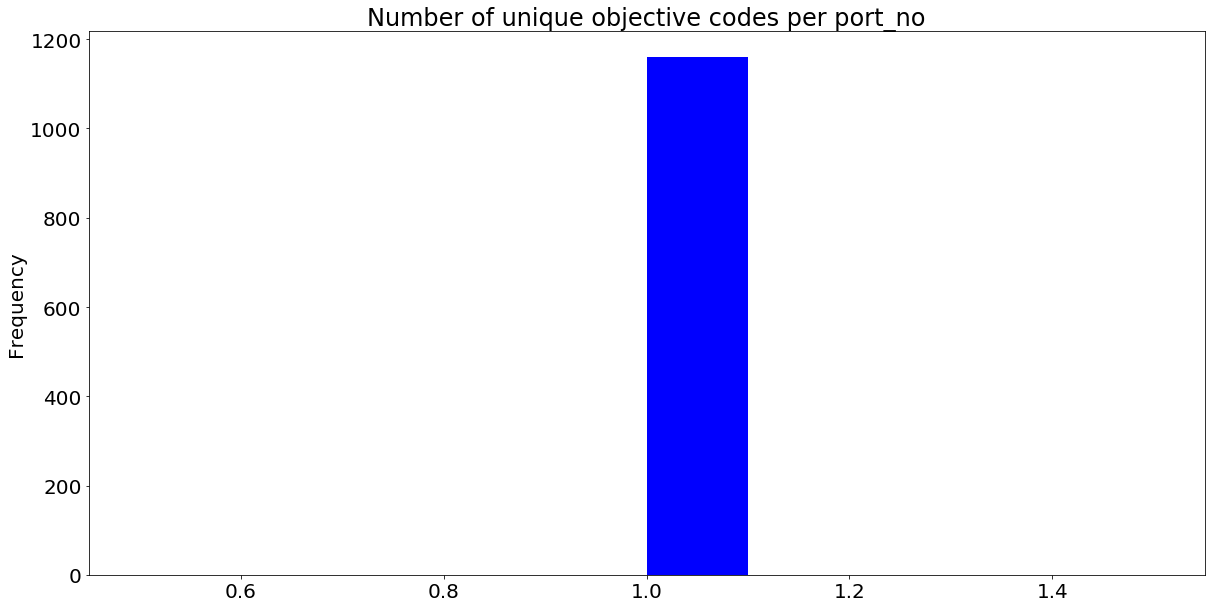

In [114]:
obj_per_portno = info_df[['port_no','lipper_class']]
ax = (obj_per_portno["lipper_class"]
    .groupby([
        obj_per_portno["port_no"]
    ])
    .nunique()
    .sort_values()
    .plot(kind="hist",
          color = 'b',
          bins = 10,
          figsize=(20,10),
          title='Number of unique objective codes per port_no')
)

In [115]:
lagged_class = info_df[['port_no','report_dt','lipper_class']]

lagged_class = lagged_class.assign(lag_lipper_class = lagged_class.lipper_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'port_no').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

round(pd.crosstab(lagged_class.lipper_class, lagged_class.lag_lipper_class, normalize = 'all') * 100,2)

""


In [116]:
lagged_class = info_df[['port_no','report_dt','style_class']]

lagged_class = lagged_class.assign(lag_style_class = lagged_class.style_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'port_no').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

pd.crosstab(lagged_class.style_class, lagged_class.lag_style_class)

""


In [126]:
lagged_class = info_df[['port_no','report_dt','cap_class']]

lagged_class = lagged_class.assign(lag_cap_class = lagged_class.cap_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'port_no').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

In [127]:
round(pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True, normalize= 'all') *100,2)

ValueError: No objects to concatenate

In [119]:
pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True)

ValueError: No objects to concatenate

### Check importance of port_no map

In [120]:
path = '../data/raw/portno_map.feather'
portno_map = feather.read_dataframe(path)

In [121]:
check = portno_map.groupby(['crsp_fundno','crsp_portno']).count()['begdt']

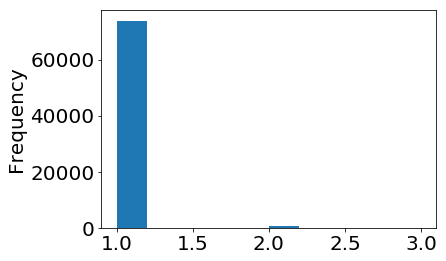

In [122]:
check.plot(kind = 'hist')

#### Only minimal importnace -> however should be implemented later

In [123]:
info_df['fund_name'].unique()

array(['AIM Sector Funds (Invesco Sector Funds): Invesco Comstock Fund; Class A Shares',
       'Neuberger Berman Equity Funds: Neuberger Berman Large Cap Value Fund; Trust Class',
       'AIM Sector Funds (Invesco Sector Funds): Invesco American Value Fund; Class Y Shares',
       ...,
       'Russell Investment Company: Multifactor US Equity Fund; Class Y Shares',
       'Financial Investors Trust: Emerald Insights Fund; Institutional Class Shares',
       'Starboard Investment Trust: Sirius S&P Strategic Large-Cap Allocation Fund'],
      dtype=object)

In [124]:
info_df.loc[info_df['fund_name'].astype(str).str.contains('S&P 500'),'fund_name']

70132     AIM Counselor Series Trust (Invesco Counselor ...
117898    Rydex Series Funds: S&P 500 Pure Growth Fund; ...
117987    Rydex Series Funds: S&P 500 Pure Value Fund; A...
118964        Rydex Variable Trust: S&P 500 Pure Value Fund
119055       Rydex Variable Trust: S&P 500 Pure Growth Fund
Name: fund_name, dtype: object